<a href="https://colab.research.google.com/github/solon-exe/iris-classification-metrics/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [3]:
from sklearn.model_selection import (cross_val_predict, KFold)
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(logistic,X,y,cv=KFold(n_splits=10, shuffle=True))
conf_mat = confusion_matrix(y,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


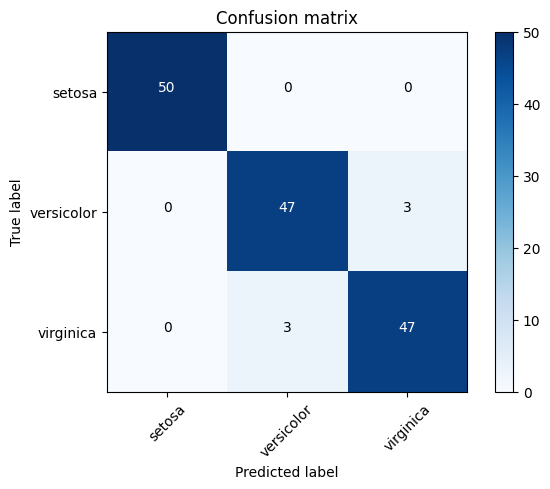

In [5]:
plot_confusion_matrix(conf_mat, list(iris.target_names))


In [6]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

for class_id, class_name in enumerate(iris.target_names):
    # binariza: classe atual = 1, resto = 0
    y_bin = (y == class_id).astype(int)
    y_pred_bin = cross_val_predict(logistic, X, y_bin, cv=KFold(n_splits=10, shuffle=True))

    VP = ((y_bin == 1) & (y_pred_bin == 1)).sum()
    VN = ((y_bin == 0) & (y_pred_bin == 0)).sum()
    FP = ((y_bin == 0) & (y_pred_bin == 1)).sum()
    FN = ((y_bin == 1) & (y_pred_bin == 0)).sum()

    sensibilidade = VP / (VP + FN) if (VP + FN) > 0 else 0
    especificidade  = VN / (VN + FP) if (VN + FP) > 0 else 0
    acuracia        = (VP + VN) / (VP + VN + FP + FN)
    precisao        = VP / (VP + FP) if (VP + FP) > 0 else 0
    f_score         = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

    print(f"\nClasse: {class_name}")
    print(f"  Sensibilidade (Recall): {sensibilidade:.2f}")
    print(f"  Especificidade      : {especificidade:.2f}")
    print(f"  Acurácia            : {acuracia:.2f}")
    print(f"  Precisão (Precision): {precisao:.2f}")
    print(f"  F-score             : {f_score:.2f}")


Classe: setosa
  Sensibilidade (Recall): 1.00
  Especificidade      : 1.00
  Acurácia            : 1.00
  Precisão (Precision): 1.00
  F-score             : 1.00

Classe: versicolor
  Sensibilidade (Recall): 0.38
  Especificidade      : 0.85
  Acurácia            : 0.69
  Precisão (Precision): 0.56
  F-score             : 0.45

Classe: virginica
  Sensibilidade (Recall): 0.98
  Especificidade      : 0.97
  Acurácia            : 0.97
  Precisão (Precision): 0.94
  F-score             : 0.96


Confusion matrix, without normalization
[[ 50   0]
 [  0 100]]

--- Métricas Setosa vs Não-Setosa ---
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
Precisão: 1.00
F-score: 1.00


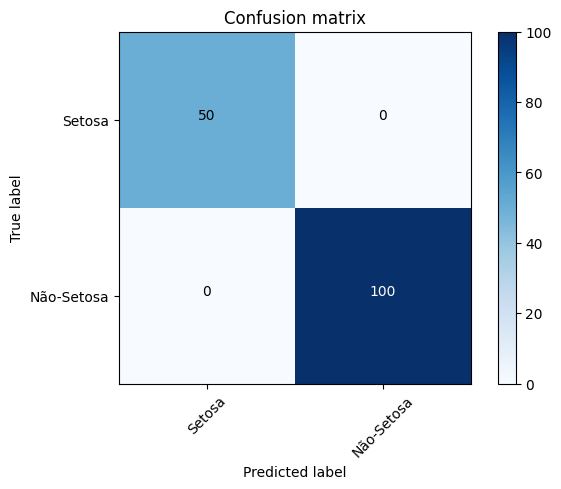

In [7]:
y_bin2 = (y != 0).astype(int)  # 0 = Setosa, 1 = Não-Setosa
y_pred_bin2 = cross_val_predict(logistic, X, y_bin2, cv=KFold(n_splits=10, shuffle=True))
conf_mat_bin2 = confusion_matrix(y_bin2, y_pred_bin2)
plot_confusion_matrix(conf_mat_bin2, classes=["Setosa","Não-Setosa"], normalize=False)

# calcula e exibe métricas
VP = conf_mat_bin2[1,1]
VN = conf_mat_bin2[0,0]
FP = conf_mat_bin2[0,1]
FN = conf_mat_bin2[1,0]

sens = VP / (VP + FN)
esp  = VN / (VN + FP)
acc  = (VP + VN) / (VP + VN + FP + FN)
prec = VP / (VP + FP)
f1   = 2 * (prec * sens) / (prec + sens)

print(f"\n--- Métricas Setosa vs Não-Setosa ---")
print(f"Sensibilidade: {sens:.2f}")
print(f"Especificidade: {esp:.2f}")
print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"F-score: {f1:.2f}")